<a href="https://colab.research.google.com/github/SuperMohit/100-Days-Of-ML-Code/blob/master/Project_1_rooftop_solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
# !ls '/content/drive/MyDrive/'
!cp -r '/content/drive/MyDrive/Solarrooftop/' '/content/shared_folder/'
!ls '/content/shared_folder/'



SEE912_project_1.pdf  test  train


Train Folder:

Displaying top 5 images in 'nosolar' subfolder:


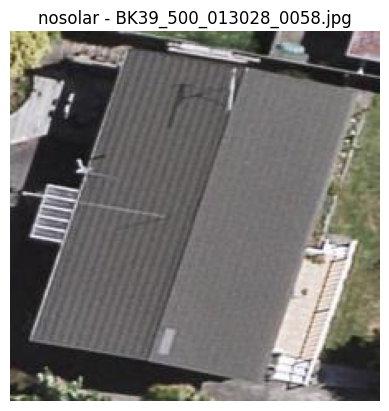

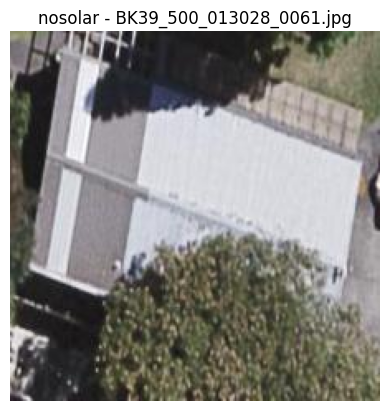


Displaying top 5 images in 'solar' subfolder:


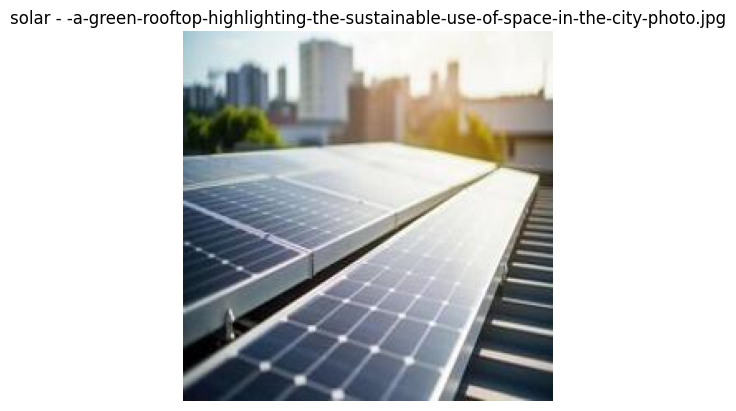

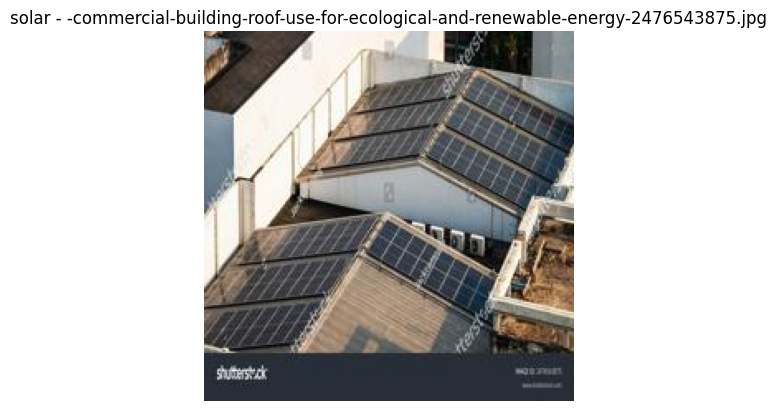


Test Folder:

Displaying top 5 images in 'nosolar' subfolder:


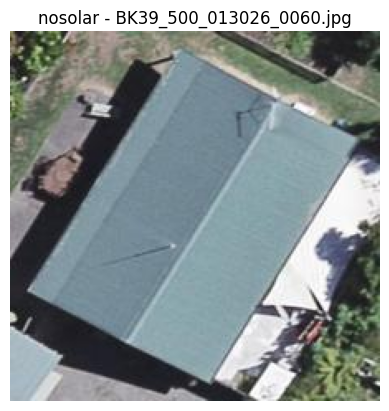

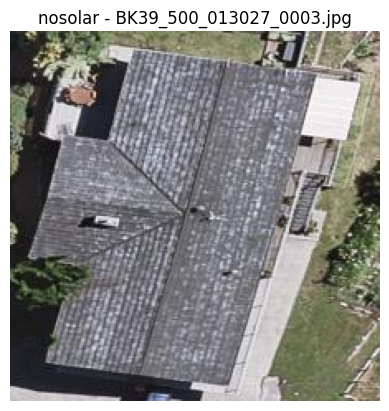


Displaying top 5 images in 'solar' subfolder:


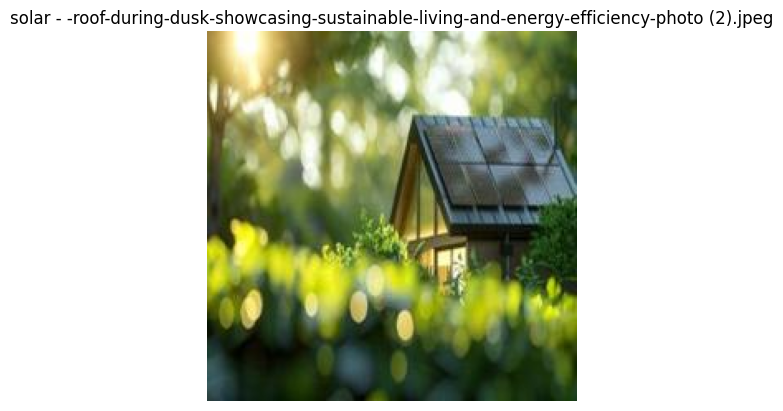

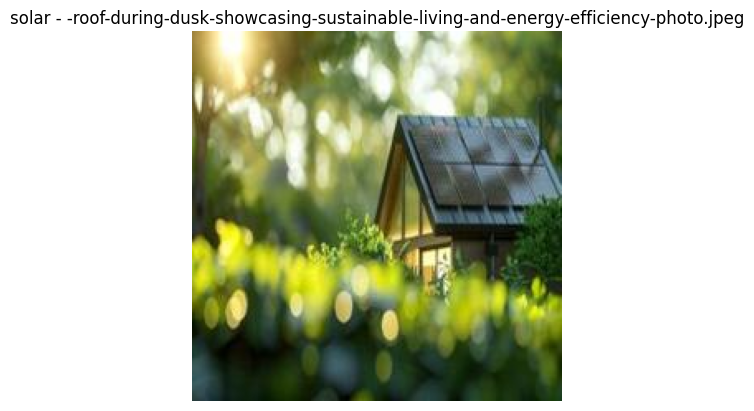

In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace these paths with the actual paths to your train and test folders
train_folder = '/content/shared_folder/train'
test_folder = '/content/shared_folder/test'

# Function to display top 5 images in each subfolder
def display_top_images(folder_path):
    # Get list of subfolders (e.g., 'solar' and 'nosolar')
    subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)
        # List all image files in the subfolder
        images = [f for f in os.listdir(subfolder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
        images.sort()  # Optional: sort the images
        top_images = images[:2]  # Get the top 5 images
        print(f"\nDisplaying top 5 images in '{subfolder}' subfolder:")
        for image_name in top_images:
            image_path = os.path.join(subfolder_path, image_name)
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.title(f"{subfolder} - {image_name}")
            plt.axis('off')  # Hide axis
            plt.show()

# Display top 5 images in the train folder
print("Train Folder:")
display_top_images(train_folder)

# Display top 5 images in the test folder
print("\nTest Folder:")
display_top_images(test_folder)



In [7]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [12]:
# Load Images:

# Loop through each image in the 'train' folder, resize them to a fixed size (e.g., 64x64), and flatten them into a one-dimensional array.
# Assign labels based on the folder ('solar' or 'nosolar').

image_size = (64, 64)
data = []
labels = []

for category in ['solar', 'nosolar']:
    folder_path = os.path.join(train_folder, category)
    label = 1 if category == 'solar' else 0
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize(image_size)
            img_array = np.array(img).flatten() / 255.0  # Normalize pixel values
            data.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
# Check the shape of a sample image
print("Sample image shape:", data[0].shape)

X = np.array(data)
y = np.array(labels)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Sample image shape: (12288,)


In [14]:
# Building the MLP Model:

# Import Keras Modules:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

#Define the Model:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Use Input layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
#train the model
import time
start_time = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)
end_time = time.time()
training_time = end_time - start_time
print(f"Total training time: {training_time} seconds")


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6376 - loss: 1.6475 - val_accuracy: 0.8167 - val_loss: 0.3988
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8755 - loss: 0.3193 - val_accuracy: 0.8472 - val_loss: 0.3172
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8577 - loss: 0.3171 - val_accuracy: 0.8444 - val_loss: 0.3456
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9095 - loss: 0.2634 - val_accuracy: 0.9111 - val_loss: 0.2218
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9340 - loss: 0.1914 - val_accuracy: 0.9139 - val_loss: 0.2094
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9434 - loss: 0.1657 - val_accuracy: 0.8583 - val_loss: 0.3364
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8772 - loss: 0.2943 - val_accuracy: 0.9194 - val_loss: 0.1983
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9459 - loss: 0.1450 - val_accuracy: 0.9278 - v

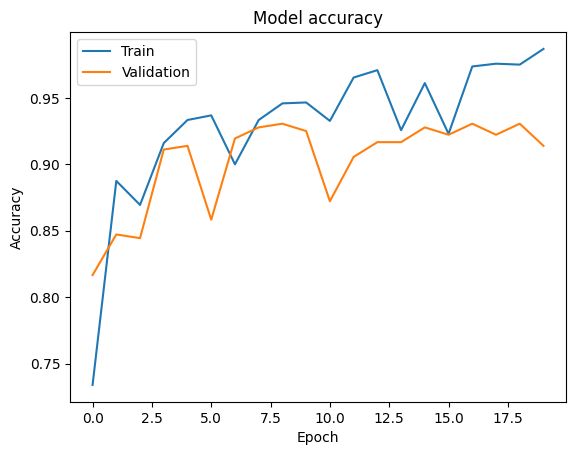

In [18]:


# plot loss
import matplotlib.pyplot as plt
# Plot training & validation accuracy values

def plot():
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

plot()


In [19]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9416 - loss: 0.1416
Validation Accuracy: 0.9138888716697693


In [32]:
#Implement a simple CNN with one convolutional layer and train it on the dataset.

In [13]:
# flatten the data in 2D
image_size = (64, 64)
data = []
labels = []

for category in ['solar', 'nosolar']:
    folder_path = os.path.join(train_folder, category)
    label = 1 if category == 'solar' else 0
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize(image_size)
            img_array = np.array(img) / 255.0  # Normalize pixel values
            data.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
# Check the shape of a sample image
print("Sample image shape:", data[0].shape)

# split data
X = np.array(data)
y = np.array(labels)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Sample image shape: (64, 64, 3)


In [22]:
# build cnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │          30,753 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,649 (123.63 KB)

 Trainable params: 31,649 (123.63 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [38]:
#train the model

In [24]:
import time
start_time = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)
end_time = time.time()
training_time = end_time - start_time
print(f"Total training time: {training_time} seconds")


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.7277 - loss: 0.5210 - val_accuracy: 0.9889 - val_loss: 0.0839
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9798 - loss: 0.0776 - val_accuracy: 0.9917 - val_loss: 0.0475
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9941 - loss: 0.0451 - val_accuracy: 0.9972 - val_loss: 0.0302
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.9939 - loss: 0.0303 - val_accuracy: 0.9972 - val_loss: 0.0256
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9976 - loss: 0.0211 - val_accuracy: 0.9944 - val_loss: 0.0344
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9945 - loss: 0.0187 - val_accuracy: 0.9917 - val_loss: 0.0246
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.9982 - loss: 0.0139 - val_accuracy: 0.9944 - val_loss: 0.0283
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9996 - loss: 0.0076 - val_accuracy: 0.9944 

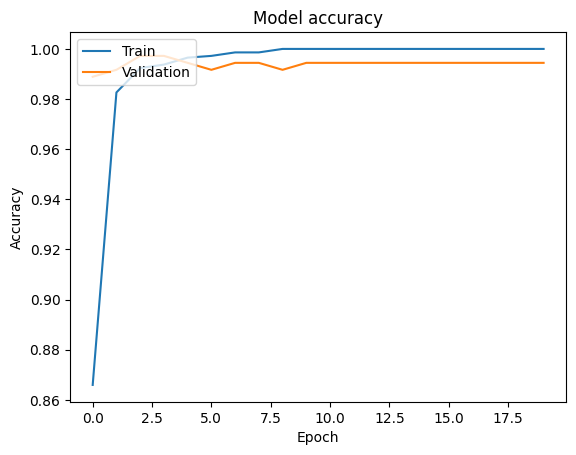

In [25]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [26]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9971 - loss: 0.0164
Validation Accuracy: 0.9944444298744202


In [44]:
# load and process test data

In [27]:
# Similar to training data preprocessing
test_data = []
test_labels = []

for category in ['solar', 'nosolar']:
    folder_path = os.path.join(test_folder, category)
    label = 1 if category == 'solar' else 0
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize(image_size)
            img_array = np.array(img) / 255.0
            test_data.append(img_array)
            test_labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [28]:
X_test = np.array(test_data)
y_test = np.array(test_labels)


In [82]:
# evaluate on test data

In [29]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0031
Test Accuracy: 1.0


In [84]:
#Experimenting with CNN Architectures

In [30]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 822,337 (3.14 MB)

 Trainable params: 822,337 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
start_time = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)
end_time = time.time()
training_time = end_time - start_time
print(f"Total training time: {training_time} seconds")


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.5995 - loss: 0.7450 - val_accuracy: 0.9722 - val_loss: 0.1244
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - accuracy: 0.9616 - loss: 0.1048 - val_accuracy: 0.9722 - val_loss: 0.0750
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.9850 - loss: 0.0531 - val_accuracy: 0.9972 - val_loss: 0.0326
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.9849 - loss: 0.0500 - val_accuracy: 0.9750 - val_loss: 0.0519
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.9917 - loss: 0.0267 - val_accuracy: 0.9667 - val_loss: 0.0949
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 224ms/step - accuracy: 0.9757 - loss: 0.0620 - val_accuracy: 0.9944 - val_loss: 0.0267
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.9975 - loss: 0.0092 - val_accuracy: 0.9972 - val_loss: 0.0195
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.9967 - loss: 0.0142 - val_accur

In [32]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9909 - loss: 0.0318
Validation Accuracy: 0.9944444298744202


In [33]:
test_data = []
test_labels = []

for category in ['solar', 'nosolar']:
    folder_path = os.path.join(test_folder, category)
    label = 1 if category == 'solar' else 0
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize(image_size)
            img_array = np.array(img) / 255.0
            test_data.append(img_array)
            test_labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

X_test = np.array(test_data)
y_test = np.array(test_labels)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 1.0000 - loss: 0.0014
Test Accuracy: 1.0


In [35]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf


image_size = (224, 224)
data = []
labels = []

for category in ['solar', 'nosolar']:
    folder_path = os.path.join(train_folder, category)
    label = 1 if category == 'solar' else 0
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path).convert('RGB')  # Ensure images are in RGB
            img = img.resize(image_size)
            img_array = np.array(img) / 255.0  # Normalize pixel values
            data.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
print("Sample image shape:", data[0].shape)

# Convert to NumPy arrays
X = np.array(data)
y = np.array(labels)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Sample image shape:", X_train.shape[1:])


Sample image shape: (224, 224, 3)
Sample image shape: (224, 224, 3)


In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained ResNet50 model without the top classification layers
base_model = ResNet50(weights='imagenet', include_top=False)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Display the model summary
model.summary()

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │ 256)                   │                │                        │
├──────────────────────

 Total params: 23,653,313 (90.23 MB)

 Trainable params: 65,601 (256.25 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    fill_mode="nearest"
)

# Apply data augmentation to the training data
train_generator = train_datagen.flow(
    X_train, y_train, batch_size=32
)

# For validation data, just rescale
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow(
    X_val, y_val, batch_size=32
)


In [16]:
# Train the model using generators
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    validation_data=val_generator,
    validation_steps=len(X_val) // 32,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 648ms/step - accuracy: 0.4913 - loss: 0.6954 - val_accuracy: 0.5057 - val_loss: 0.6722
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 0.6990
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 600ms/step - accuracy: 0.5426 - loss: 0.6776 - val_accuracy: 0.7869 - val_loss: 0.6389
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.6207
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 552ms/step - accuracy: 0.6916 - loss: 0.6485 - val_accuracy: 0.8068 - val_loss: 0.6039
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.5799
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 547ms/step - accuracy: 0.7408 - loss: 0.6224 - val_accuracy: 0.6790 - val_loss: 0.5840
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.5381
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 27s 587ms/step - accuracy: 0.6653 - loss: 0.6142 

In [17]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 350ms/step - accuracy: 0.7995 - loss: 0.5522
Validation Accuracy: 0.824999988079071


In [18]:
# Load and preprocess test data
test_data = []
test_labels = []

for category in ['solar', 'nosolar']:
    folder_path = os.path.join(test_folder, category)
    label = 1 if category == 'solar' else 0
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize(image_size)
            img_array = np.array(img) / 255.0
            test_data.append(img_array)
            test_labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

X_test = np.array(test_data)
y_test = np.array(test_labels)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 474ms/step - accuracy: 0.8097 - loss: 0.5370
Test Accuracy: 0.8399999737739563


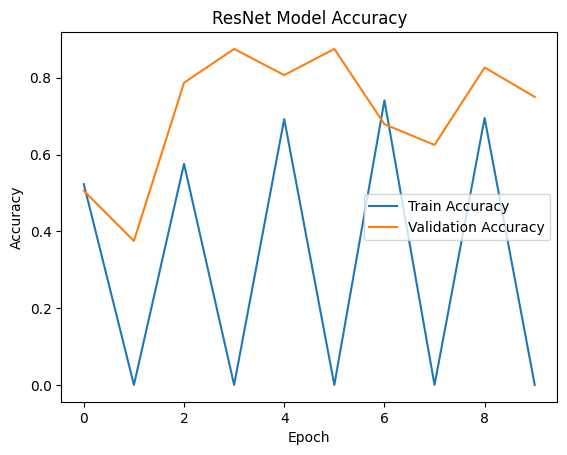

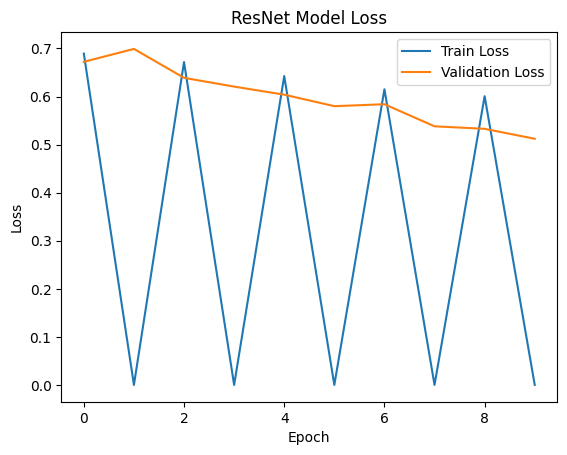

In [19]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
